# 5. Diagrams and Geo-mapping


## Part (1) - Advanced diagrams

You may want to create advanced diagrams, that combine different subplots, annotations, or different elements on the same graph.

The key for this is to understand how `matplotlib` uses `Axes`.

`Axes` are the objects that you want to fill with the information to plot. You can arrange them however you want.

It is by modifying the properties of the `ax.` objects that you can play with:
- titles,
- axis limits,
- legend
- font and sizes,
- colours and backgrounds,
- etc.

We start by importing essential packages:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We will create an increasingly customised graph.
To do this step by step, **uncomment** one block **at a time** and reexcute the cell each time.

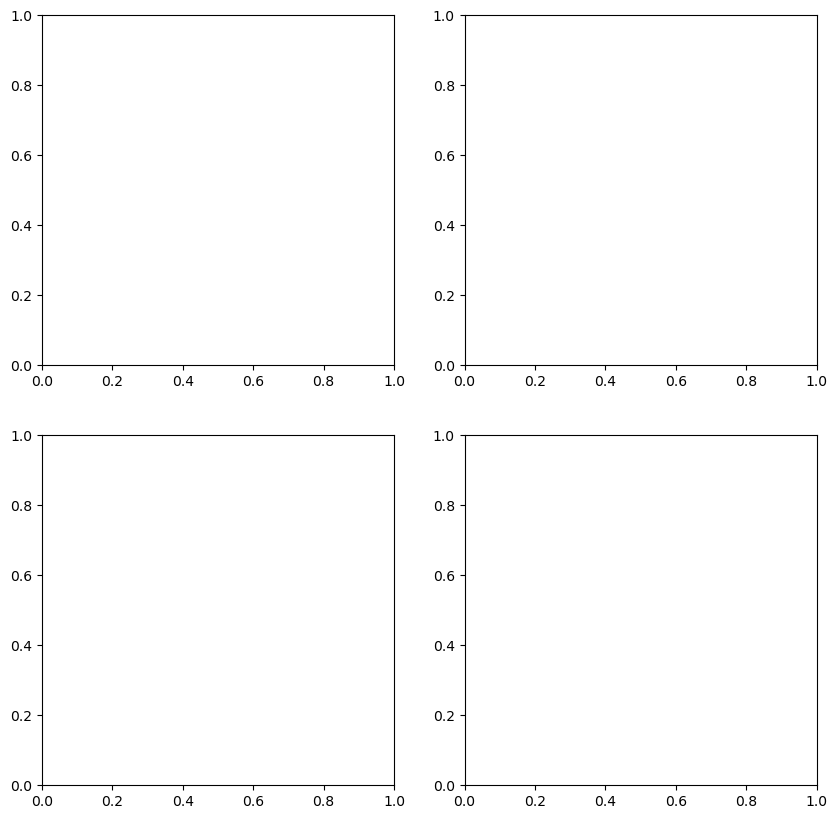

In [2]:
# Let's start by creating some sets of 50 random values.
x_values = range(50)
y_values_1 = np.random.randn(50)
y_values_2 = np.random.randn(50)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))



# #BLOCK 1. top-left: plotting with x and y values.
# axes[0,0].plot(x_values,y_values_1)
# # ------------ #

# #BLOCK 2. top-right: changing the color and the linestyle
# axes[0,1].plot(x_values,y_values_1, color='orange', linestyle='--')
# # ------------ #

# #BLOCK 3. bottom-left: stacking two plots together
# axes[1,0].plot(x_values,y_values_1, color='blue', linestyle=':', label='values_1')
# axes[1,0].plot(x_values,y_values_2, color='red', linestyle='-', label='values_2')
# # ------------ #

# #BLOCK 4. bottom-right: using a scatter plot and changing the size
# axes[1,1].scatter(x_values, y_values_1, color='green', s=7)
# # ------------ #

# #BLOCK 5. Adding titles
# axes[0,0].set_title('Line plot')
# axes[0,1].set_title('Line plot')
# axes[1,0].set_title('Line plot')
# axes[1,1].set_title('Scatter plot')
# # ------------ #

# #BLOCK 6. Adding a legend. For that you need to have specified the labels when plotting (cf. supra)
# axes[1,0].legend()
# # ------------ #

# #BLOCK 7. Adding axes title. Here we can be a bit clever and not copy-paste the same instructions four times
# # We can also play with the 'fontsize' to make our label small.
# for ax in axes.flatten():
#     ax.set_xlabel('some x-variable', fontsize=5)
#     ax.set_ylabel('some y-variable', fontsize=5)
# # ------------ #

# #BLOCK 8. Sometimes you may want to specify the x or y limits. Let's do this for one axis:
# axes[0,1].set_xlim(10,30)
# axes[0,1].set_ylim(-0.5,0.5)
# # ------------ #

# #BLOCK 9. Adding a general title. Note that this time you call the figure (fig) and not the axes.
# fig.suptitle('Four different plots')
# # ------------ #

# #BLOCK 10. Exporting to a file.
# plt.savefig('my_figure.png')
# # ------------ #

plt.show()

## Part (2) - Geocoding

It might be useful to some of you to convert some place name in your dataset to actual geographical coordinates.

For example, this is crucial if you want to map out your data entries.

To illustrate this, we will start from the dataset of books from the British Library we used a few notebooks ago.

In [3]:
books_df = pd.read_json('../data/bl_books/sample/book_data_sample.json')

/var/folders/h0/0v0s48pj41zdnzdy7333vb4m0000gn/T/ipykernel_67345/887626485.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  books_df = pd.read_json('../data/bl_books/sample/book_data_sample.json')



The aim is to convert the value of the publishing place to geographical coordinates (latitude, longitude).

The package `geopy` will help us out in this.

In [4]:
import geopy

We want to create a dictionary whose entries are:


`{place_name : (latitude, longitude)}`

In [5]:
# Let's start by extracting the unique places:

all_place_names_in_df = books_df['place'].unique()

In [6]:
# And by initialising our adress locator;

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="dhoxss_paul")

In [7]:
# We can see that it performs well:

for place_name in all_place_names_in_df[:10]:
    location = geolocator.geocode(place_name)
    print(place_name, '-->\t', location.address)

Calcutta -->	 Kolkata, West Bengal, India
London -->	 London, Greater London, England, United Kingdom
Toronto -->	 Toronto, Golden Horseshoe, Ontario, Canada
Omaha, Neb -->	 Omaha, Douglas County, Nebraska, United States
Philadelphia -->	 Philadelphia, Philadelphia County, Pennsylvania, United States
Bradford-on-Avon -->	 Bradford-on-Avon, Wiltshire, England, United Kingdom
Dundee -->	 Dundee, Dundee City, Alba / Scotland, DD1 1SA, United Kingdom
New York -->	 City of New York, New York, United States
Providence -->	 Providence, Providence County, Rhode Island, United States
Selkirk -->	 Selkirk, Manitoba, Canada


We can now build our complete dictionaries by iterating over all of them.

In [8]:
# We want to get rid of some that give wrong results:
bad_ones = ['enk', 'Rye', '']

place2coords = {}

for place_name in all_place_names_in_df:
    if place_name not in bad_ones:
    
        location = geolocator.geocode(place_name)
        if location is not None:
            result = location.address
            place2coords[place_name] = (location.longitude, location.latitude)
        else:
            pass

And we can finally add this to our dataframe.

In [9]:
books_df['coords'] = books_df['place'].map(place2coords)

In [10]:
books_df.head()

,datefield,shelfmarks,publisher,title,edition,flickr_url_to_book_images,place,issuance,authors,date,pdf,identifier,corporate,fulltext_filename,imgs,coords
0,1841,[British Library HMNTS 11601.ddd.2.],Privately printed,"[The Poetical Aviary, with a bird's-eye view o...",,http://www.flickr.com/photos/britishlibrary/ta...,Calcutta,monographic,{'creator': ['A. A.']},1970-01-01 00:30:41,{'1': 'lsidyv35c55757'},196,{},sample/full_texts/000000196_01_text.json,NaN,"(88.3638953, 22.5726459)"
1,1888,[British Library HMNTS 9025.cc.14.],Rivingtons,[A History of Greece. Part I. From the earlies...,,http://www.flickr.com/photos/britishlibrary/ta...,London,monographic,"{'creator': ['Abbott, Evelyn']}",1970-01-01 00:31:28,{'1': 'lsidyv376da437'},4047,{},sample/full_texts/000004047_01_text.json,{'0': {'000257': ['11104648374']}},"(-0.14405508452768728, 51.4893335)"
2,"1847, 48 [1846-48]","[British Library HMNTS C.131.d.16., British Li...",Punch Office,[The Comic History of England ... With ... col...,,http://www.flickr.com/photos/britishlibrary/ta...,London,monographic,"{'contributor': ['LEECH, John - Artist'], 'cre...",1970-01-01 00:30:47,{'1': 'lsidyv38b27a31'},5382,{},sample/full_texts/000005382_01_text.json,"{'0': {'000410': ['11026944866'], '000412': ['...","(-0.14405508452768728, 51.4893335)"
3,1892,[British Library HMNTS 10351.cc.60.],"Eden, Remington & Co.",[The Cruise of “The Tomahawk”: the story of a ...,,http://www.flickr.com/photos/britishlibrary/ta...,London,monographic,"{'creator': ['Laffan, De Courcy - Mrs']}",1970-01-01 00:31:32,{'1': 'lsidyv3c4a946a'},14627,{},sample/full_texts/000014627_01_text.json,"{'0': {'000134': ['11300364604'], '000039': ['...","(-0.14405508452768728, 51.4893335)"
4,1863,[British Library HMNTS 9078.c.10.],Virtue Bros. & Co.,[Scenes from the Drama of European History],,http://www.flickr.com/photos/britishlibrary/ta...,London,monographic,"{'creator': ['Adams, W. H. Davenport (William ...",1970-01-01 00:31:03,{'1': 'lsidyv32c34c22'},17057,{},sample/full_texts/000017057_01_text.json,{'0': {'000005': ['11046098454']}},"(-0.14405508452768728, 51.4893335)"


## Part (3) - Geomapping

Finally, we want to use this new information and store it in an appropriate format.

This is the point of `GeoPandas`, a sort of geographical upgrade of `Pandas`.

It has the same logic: series, dataframes, indexing, etc. Except that each row must have its own geometry.

It is particularly powerful when you want to plot things in a geographical space.

Let's first import it. (You can install `geopandas` via *conda* if you don't already have it.)

In [11]:
import geopandas as gp
from shapely.geometry import Point

Step 1: Create a Series of geometries (using `shapely`)

In [12]:
located_books = books_df.loc[books_df['coords'].notna()]
geometries = [Point(i) for i in located_books['coords'].values]

Step 2: Create the `GeoDataFrame`

In [13]:
gdf = gp.GeoDataFrame(located_books, geometry=geometries)

Step 3: Plot the `GeoDataFrame`

To plot a GeoDataFrame, simply use the `.plot()` method.

<Axes: >

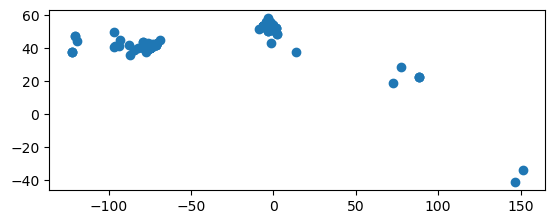

In [14]:
gdf.plot()

Importantly, this returns a `matplotlib axes` object. 

Therefore, to customise your map, you can use the matplotlib methods we've seen above.

By getting and calling the axis, map layers can be combined. We will show as an example how to add the background of countries:

In [15]:
#This loads a sample dataset.
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

/var/folders/h0/0v0s48pj41zdnzdy7333vb4m0000gn/T/ipykernel_67345/3539808895.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))


<Axes: >

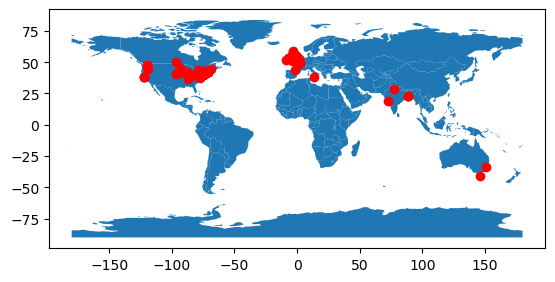

In [16]:
# We create our basemap by plotting these countries and getting the axes (storing them in the "ax" variable)
ax=world.plot()

# To add a new layer, we then specify on which axis to plot: ax=ax
gdf.plot(ax=ax, color='red')

Finally, a bit of customisation.

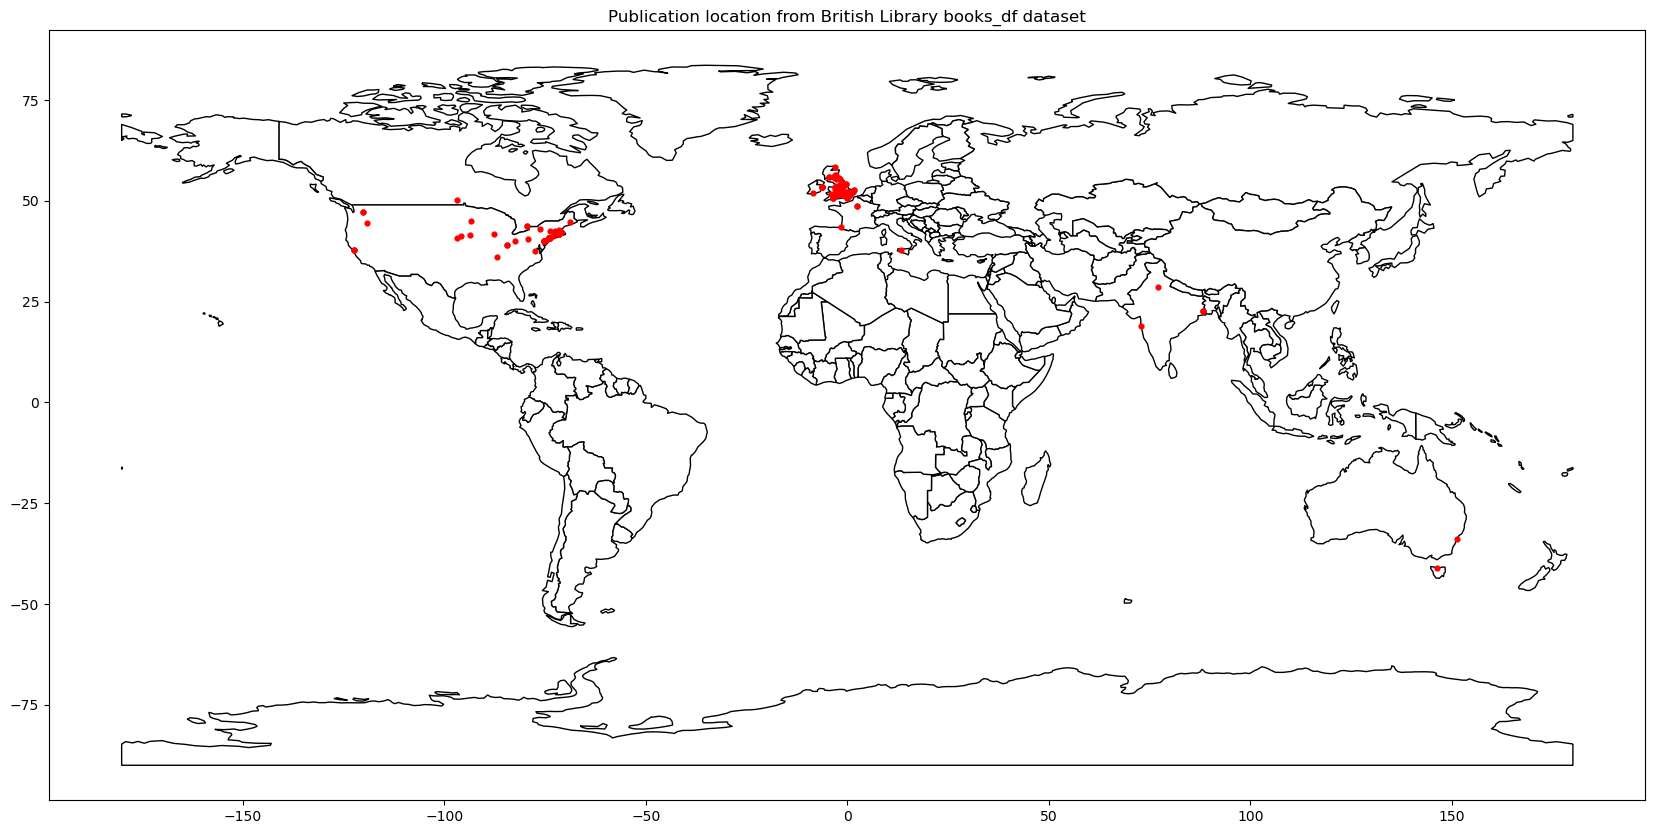

In [17]:
# We create our basemap by plotting these countries and getting the axes (storing them in the "ax" variable)
ax=world.plot(color='white', edgecolor='black', figsize=(30,10))

# To add a new layer, we then specify on which axis to plot: ax=ax
gdf.plot(ax=ax, marker='o', color='red', markersize=12)

#Setting a title
ax.set_title('Publication location from British Library books_df dataset')

plt.show()

/Users/guhennec/miniconda3/envs/dhoxss/lib/python3.12/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


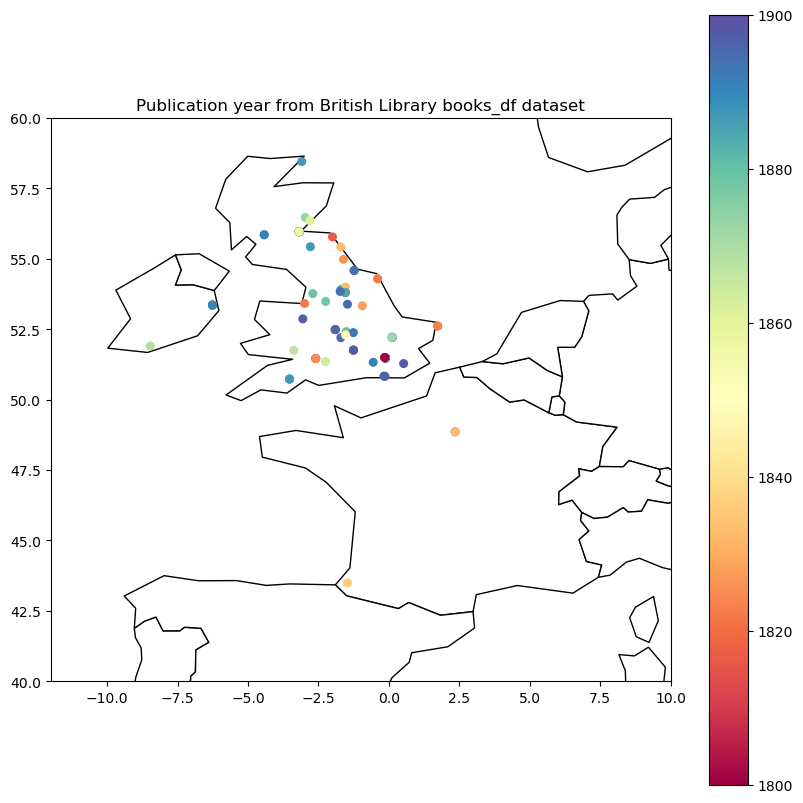

In [18]:
# Again we start with a background
ax=world.plot(color='white', edgecolor='black', figsize=(10,10))

# But this time we colour the point based on their year.
# We only keep the rows that are numbers.
# And we plot specifying the colour map, between the years 1800 and 1900.
gdf_withyear = gdf.loc[gdf['datefield'].str.isnumeric()]
gdf_withyear['datefield'] = gdf_withyear['datefield'].astype(int)

gdf_withyear.plot(ax=ax, column='datefield', marker='o', markersize=30, cmap='Spectral', legend=True, vmin=1800, vmax=1900)

#Zooming in on Britain
ax.set_xlim(-12, 10)
ax.set_ylim(40, 60)

#Setting a title
ax.set_title('Publication year from British Library books_df dataset')

plt.show()

## Part (4) - Combing the two

As a last note, we may want to combine a map with a graph, side by side.

To do that, create a `matplotlib` figure with two axes, and fill one axis with a map, and the other with the other graph:

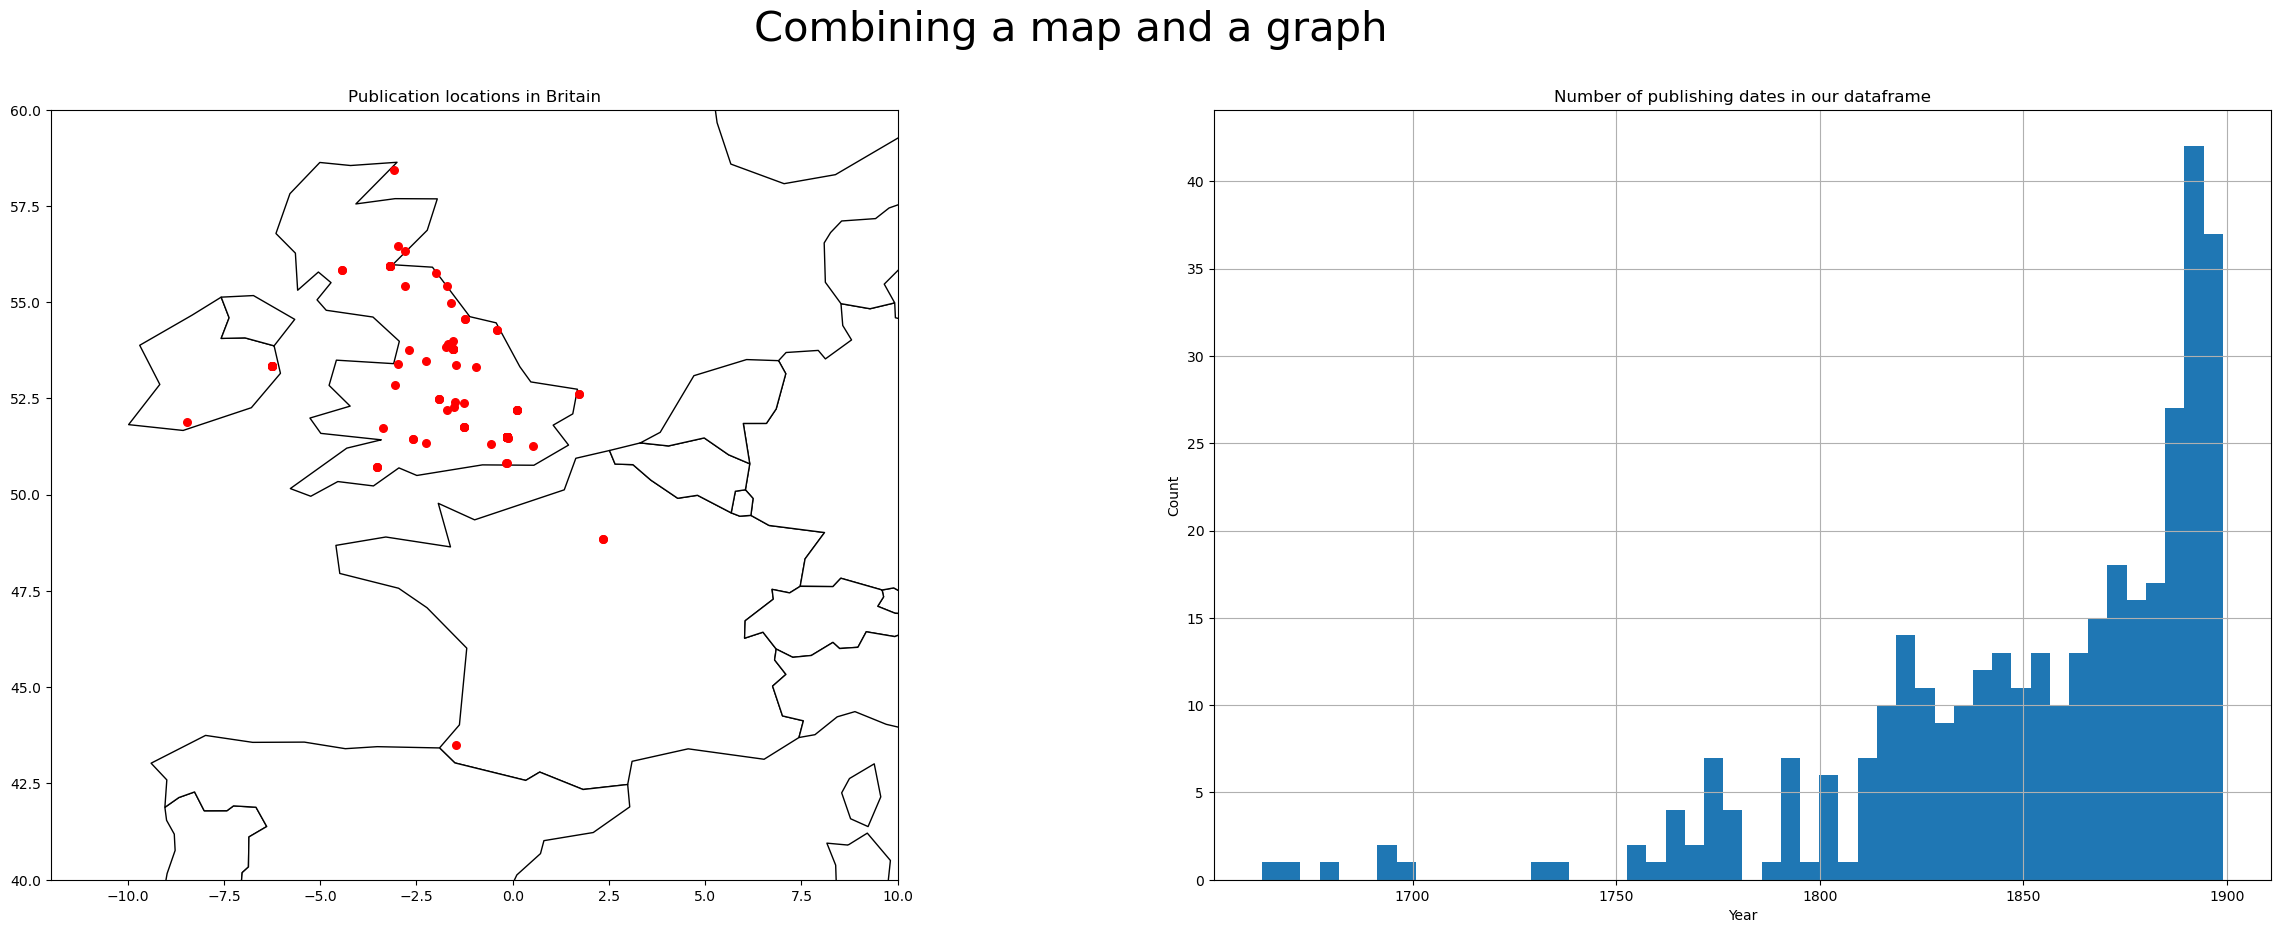

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,10))

map_axis = axes[0]
graph_axis = axes[1]

# Sorting out the map axis on the left
world.plot(ax = map_axis, color='white', edgecolor='black')
gdf_withyear.plot(ax = map_axis, color='red', marker='o', markersize=30)
map_axis.set_xlim(-12, 10)
map_axis.set_ylim(40, 60)
map_axis.set_title('Publication locations in Britain')

# Sorting out the graph axis on the right, with for example a histogram of the publication years
gdf_withyear['datefield'].hist(ax=graph_axis, bins=50)
graph_axis.set_title('Number of publishing dates in our dataframe')
graph_axis.set_xlabel('Year')
graph_axis.set_ylabel('Count')

fig.suptitle('Combining a map and a graph', fontsize=30)

plt.show()